In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [345]:
import matplotlib.pyplot as plt
from scipy import stats
import math
from copy import deepcopy
import numpy as np
from skimage.measure import label
from collections import Counter

%matplotlib inline

### Create the discrete HOT model:

In [631]:
class Grid(object):
    """
        GRID: A discrete, 2-d lattice of trees.
    """
    def __init__(self, L=32, l=32):
        """
            __INIT__: initial conditions on model. Tunable parameters  are the dimension of the 2-d landscape
                      and the characteristic scale of the distribution.
                      
                      ARGS:
                              L: dimension of the 2-d lattice. Type: Int
                              
                              l: characteristic scale of the distribution. Type: Float
                    
                    RETURNS:
                              a discrete 2D lattice to be evaluated by the HOT model:
        """
        
        #___________________________________TUNABLE PARAMETERS:_________________________________:
        
        #define the dimension of the grid:
        self.L = L
        
        #define the characteristic scale of the distribution:
        self.l = l/10
        
        #__________________________________THINGS TO LOOK AFTER:________________________________:
        
        #initialize a grid:
        self.grid = np.zeros((L, L), dtype=int)
        
        #keep track of which spots are trees:
        self.indices = np.array(list(np.ndindex(self.grid.shape)))
        
        #store a cost value(i.e: what is the cost of a tree being placed at particular site?):
        self.cost = 0
        
        #initialize a probability at each site for catching fire:
        self.p = np.zeros((L, L), dtype=float)
        
        #store the density of trees (number of trees / area of the landscape):
        self.density = 0 
        
        #store the yield of the forest:
        self.yld = 0
        
        #keep track of the component sizes:
        self.sizes = np.zeros((L, L), dtype=int)
        
        
        
        
        
    #_______________________________________IMPORTANT METHODS:___________________________________:
    
    def get_indices(self, t):
        """
            GET_INDICES: creates a shuffled list of array indices. We will draw the first D
                         indices to become trees later.
                         
                         ARGS:
                                 t: current time step
                        
                      RETURNS:
                                 None (shuffles self.indices inplace)
        """
        
        #randomly shuffle them (when t=0, shuffle all. When t=n shuffle only from index n on):
        np.random.shuffle(self.indices[t:])
    
        
    def place_tree(self, t):
        """
            PLACE_TREE: choose a location on the landscape to place a tree.
            
                       ARGS:
                              t: current timestep
                              
                    RETURNS:
                              None
        """
        
        #get site:
        
        
        #grow tree on site:
        self.grid[self.indices[t][0], self.indices[t][1]] = 1

    def gen_probs(self):
        """
            GEN_PROBS: Generates the probability of a spark at each site on the landscape.
                       At any site, the probability of a spark becomes 
                       
                       P(i,j) = e^-(i/l) * e^-(j/l)
            
                       ARGS:
                            None
                    
                    RETURNS:
                            None
                                          
        """
        
        #generate the probaility at each index:
        for i in self.indices:
            self.p[i[0],i[1]] = (math.e**(-i[0]/self.l)) * (math.e**(-i[1]/self.l))
        
        self.p = self.p/np.sum(self.p)
                         
    def get_comp_sizes(self):
        """
            GET_COMP_SIZES: calculates the size of the component a site is connected to
                            at each site.
                            
                            ARGS:
                                 None
                            
                         RETURNS:
                                 None
        """
        
        #label the connected components:
        comps, size = label(self.grid, return_num=True)
        
        #reasign comps to be the size of the labelled component at each site:
        for i in range(1,size+1):
            comps[comps == i] = len(comps[comps == i])
        
        #set the sizes attribute equal to comps:
        self.sizes = comps
            
    def calc_density(self):
        """
            CALC_DENSITY: calculates the forest density at time t
            
                        ARGS:
                             None
                    
                      RETURN:
                             None
        """
        
        #calculate the density of the current landscape (num_trees/area):                
        self.density = np.sum(self.grid)        
    
    def calc_expected_cost(self):
        """
            CALC_EXPECTED_COST: calculates the expected cost of placing a tree at position (i,j)
            
                                ARGS:
                                     None
                                     
                             RETURNS:
                                     None
        """
        
        #calculate the expected cost of a tree placement:
        self.cost = np.sum(self.sizes * self.p)
    
    def calc_yield(self):
        """
            CALC_YIELD: calculates the yeild of the landscape based on the configuration
                        of the landscape.
                        
                        Y = density - <cost>
                        
                        ARGS:
                             None
                        
                     RETURNS:
                             None
        """
        
        #calculate the expected yield:
        self.yld = (self.density - self.cost)/self.L**2

#### Test to make sure

In [632]:
g = Grid()

In [633]:
g.get_indices(0)

In [634]:
g.indices

array([[12,  9],
       [31, 19],
       [20, 17],
       ..., 
       [ 8, 26],
       [ 0,  0],
       [30,  1]])

In [635]:
g.place_tree(0)

In [636]:
g.grid[g.grid==1]

array([1])

In [637]:
g.gen_probs()

In [638]:
g.p[g.p != 0]

array([  7.20367114e-02,   5.27031839e-02,   3.85584731e-02, ...,
         5.18241685e-10,   3.79153716e-10,   2.77394785e-10])

In [639]:
np.sum(g.p)

1.0

In [640]:
g.get_comp_sizes()

In [641]:
g.sizes[g.sizes != 0]

array([1], dtype=int64)

In [642]:
g.calc_density()

In [643]:
g.density

1

In [644]:
g.calc_expected_cost()

In [645]:
g.cost

0.00010174107938789067

In [646]:
g.calc_yield()

In [647]:
g.yld

0.00097646314347716028

In [648]:
test = np.array([Grid(32,32), Grid(32,32)])

In [649]:
for g in test:
    g.get_indices(0)
    g.gen_probs()
    
    #place a tree
    g.place_tree(0)

    #get the component sizes:
    g.get_comp_sizes()

    #calculate the forest density:
    g.calc_density()

    #calculate the current expected cost:
    g.calc_expected_cost()

    #finally, calculate the yield:
    g.calc_yield()

In [650]:
test[1].yld

0.0009765581345790509

In [651]:
max([i.yld for i in test])

0.00097656247848027617

In [652]:
g.grid

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

#### It works!

#### Now, make a HOT model!

In [895]:
class HOT(object):
    """
        HOT: Highly. Optimized. Tolerance --> for L^2 timesteps, 
             where L is the dimension of a Grid() object, calculate
             the peak yields for D varying tree densities
    """
    def __init__(self, L=32, D=2):
        """
            INIT: initializes an array of D different Grid objects,
                  keeps track of the peak yields at each time step,
                  and keeps track of the forest of peak yield at
                  each timestep.
                  
                  ARGS:
                      L: the dimension of each grid object. Type: Integer
                      
                      D: the number of different grid objects. Type: Integer
        """
        
        #how large are the varying tree densities? (LxL):
        self.L = L
        
        #determine how many varying forests to keep track of:
        self.D = D
        
        #keep track of the grids:
        self.grids = np.empty(D, dtype=object)
        
        #keep track of peak yields:
        self.peak_yld = np.zeros(L**2, dtype=float)
        
        #keep track of Landscapes that produce peak yields:
        self.peak_forests = np.empty(L**2, dtype=object)
        
        #keep track of the forest densities that produce peak yields:
        self.peak_densities = np.zeros(L**2, dtype=float)
        
        #keep track of the current best grid (represents an index of self.grids):
        self.current_best = None
        
        #store the best yield:
        self.best_yield = 0
    
    def initialize_grids(self):
        """
            INITIALIZE_GRIDS: initializes "D" grid() objects in self.grids
        """
        
        #put Grid objects in self.D:
        for i in range(self.D):
            self.grids[i] = Grid(L=self.L, l=self.L)
    
    def  eval_grids(self,t):
        """
           EVAL_GRIDS: evaluates which grid at he current time step has the best yield
           
                      ARGS:
                            t: the current time step at which to compare the grids.
                               Type: Integer
        """
        
        #get the maximum yield at time step "t":
        self.peak_yld[t] = max([i.yld for i in self.grids])
        
        #get the best grid at time "t"(if multiple grids are peak_yield, we take the first grid):
        for idx, g in enumerate(self.grids):
            if g.yld == self.peak_yld[t]:
                
                #update peak_forests:
                self.peak_forests[t] = deepcopy(g.grid)
                
                #update the peak_densities:
                self.peak_densities[t] = g.density
                
                #update current best grid:
                self.current_best = idx
                break
                
        
        #now reassign each grid that was not selected
        for i in range(self.D):
            if i != self.current_best:
                
                #reassign the grid:
                self.grids[i].grid = deepcopy(self.grids[self.current_best].grid)
                
                
                #reassign the indices:
                self.grids[i].indices = deepcopy(self.grids[idx].indices)
        
    def simulate(self):
        """
            SIMULATE: simulates the HOT model by growing trees in each
                      of the "D" grids, and storing the grids with the
                      best yields after each iteration.
                      
                      ARGS:
                          None
                   
                   RETURNS:
                          None
        """
        
        #generate the spark probabilities:
        for g in self.grids:
            g.gen_probs()
        
        #place a tree at each time step (there are LxL timesteps):
        for t in range(self.L**2):
            
            #do this for each of the "D" grids:
            for idx,g in enumerate(self.grids):
                
                #shuffle the indices if necessary:
                if idx  != self.current_best:
                    g.get_indices(t)
                
                #place a tree
                g.place_tree(t)
                
                #get the component sizes:
                g.get_comp_sizes()
                
                #calculate the forest density:
                g.calc_density()
                
                #calculate the current expected cost:
                g.calc_expected_cost()
                
                #finally, calculate the yield:
                g.calc_yield()
                
            #evaluate the best grid:
            self.eval_grids(t)
        
        #find the best outcomes:
        self.find_best()
    
    def find_best(self):
        """
            FIND_BEST: finds the grid and index associated with the best yield
            
                      ARGS:
                          None
                          
                   RETURNS:
                          None
        """
        
        #get the max yield:
        self.best_yield = max(self.peak_yld)
        
        #get the index for which the yield is the best:
        self.best_idx = np.where(self.peak_yld == self.best_yield)

In [654]:
hot = HOT()
hot.initialize_grids()
hot.simulate()

In [655]:
hot_D3 = HOT(D=3)
hot_D3.initialize_grids()
hot_D3.simulate()

In [656]:
hot_D32 = HOT(D=32)
hot_D32.initialize_grids()
hot_D32.simulate()

In [1012]:
hot_D1024 = HOT(D=32**2)

In [1013]:
hot_D1024.initialize_grids()

In [1014]:
hot_D1024.simulate()

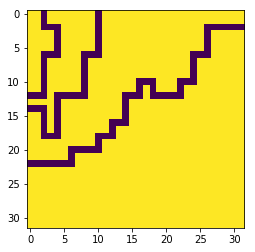

In [699]:
plt.imshow(hot_D1024.peak_forests[915])

In [700]:
max_yield_hot = max(hot.peak_yld)
max_idx_hot   = np.where(hot.peak_yld == max_yield_hot)

In [708]:
max_idx_hot[0][0]

833

In [702]:
max_yield_hot

0.7647026951171001

In [767]:
#get the max_yield for D=1
max_yield_hot_1 = max(hot_D_1.peak_yld)
max_idx_hot_1   = np.where(hot_D_1.peak_yld == max_yield_hot_1)

#get the max_yield for D=3
max_yield_hot_3 = max(hot_D3.peak_yld)
max_idx_hot_3   = np.where(hot_D3.peak_yld == max_yield_hot_3)

#get the max_yield for D=32:
max_yield_hot_32 = max(hot_D32.peak_yld)
max_idx_hot_32   = np.where(hot_D32.peak_yld == max_yield_hot_32)

#get the max yield for D=1024:
max_yield_hot_1024 = max(hot_D1024.peak_yld)
max_idx_hot_1024   = np.where(hot_D1024.peak_yld == max_yield_hot_1024)

####  Calculate the density of the best forest:
We will add an attribute in the HOT() class to keep track of this as we simulate()

(In hindsight, we should have implemented this before)

In [768]:
#use the method from Grid() to calculate the size of the neihbors and therefore the densities:
def get_densities(mat,idx,L):
    """
        GET_DENSITIES: calculates the forest density at peak yield, given the size of the grid (2-d array)
                       and the grid itself.
                       
                       ARGS:
                           idx: index of the  2D-array representing the grid with peak density(mat). Type: Integer.
                           
                         mat: the 2D-array representing the grid at Peak yield. Type: 2D np array 
                         
                           L: size of the  2D-array representing the grid with peak density(mat). Type: Integer.
    """
    
    return np.sum(mat[idx][0])/L**2

In [769]:
den_1024 = get_densities(hot_D1024.peak_forests, max_idx_hot_1024, 32)

In [770]:
hot_D1024.peak_forests[max_idx_hot_1024][0]

array([[1, 1, 0, ..., 1, 1, 1],
       [1, 1, 0, ..., 1, 1, 1],
       [1, 1, 0, ..., 1, 1, 1],
       ..., 
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

In [771]:
den_1024

0.94921875

In [751]:
hot_D_1 = HOT(D=1)
hot_D_1.initialize_grids()
hot_D_1.simulate()

#### Plot the Peak Yield Curves:

C:\Users\Dave Landay\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  
C:\Users\Dave Landay\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Dave Landay\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':
C:\Users\Dave Landay\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log10
  
C:\Users\Dave Landay\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()


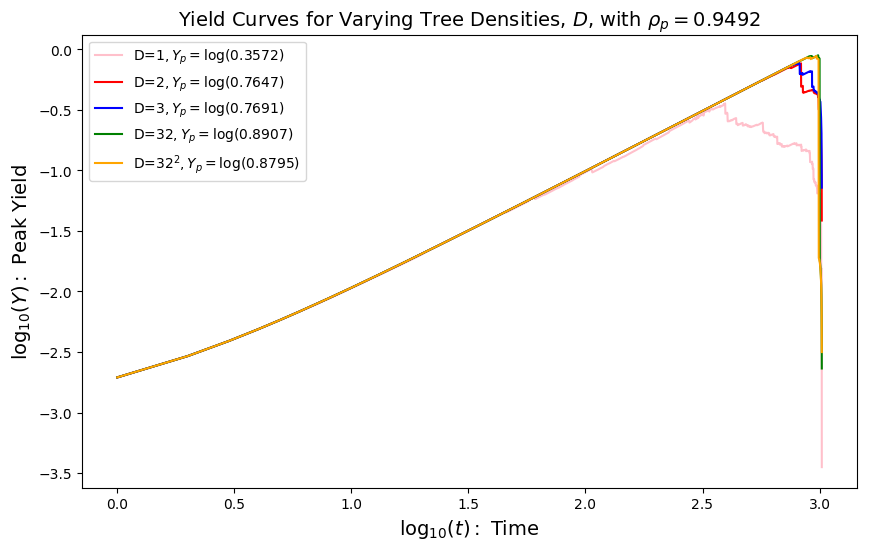

In [773]:
#get a list of times to plot the peak yields against:
times = list(range(len(hot_D3.peak_yld)))

#initialize a plot:
plt.figure(num=None, figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')

#plot the curves:
plt.plot(np.log10(times), np.log10(hot_D_1.peak_yld), color='pink', 
         label='D=$1, Y_{} = \log({})$'.format('p',round(max_yield_hot_1,4)))
plt.plot(np.log10(times), np.log10(hot.peak_yld), color='red', 
         label='D=$2, Y_{} = \log({})$'.format('p',round(max_yield_hot,4)))
plt.plot(np.log10(times), np.log10(hot_D3.peak_yld), color='blue',
         label='D=$3, Y_{} = \log({})$'.format('p',round(max_yield_hot_3,4)))
plt.plot(np.log10(times), np.log10(hot_D32.peak_yld), color='green',
         label='D=$32, Y_{} = \log({})$'.format('p',round(max_yield_hot_32,4)))
plt.plot(np.log10(times), np.log10(hot_D1024.peak_yld), color='orange', 
         label=r'D=$32^2, Y_{} = \log({})$'.format('p',round(max_yield_hot_1024,4)))

#plot the best yields:
# plt.plot(np.log10(times[max_idx_hot[0][0]]), np.log10(max_yield_hot), '1', color='red', label='')
# plt.plot(np.log10(times[max_idx_hot_3[0][0]]), np.log10(max_yield_hot_3), '1', color='blue', label='')
# plt.plot(np.log10(times[max_idx_hot_32[0][0]]), np.log10(max_yield_hot_32), '1', color='green', label='')
# plt.plot(np.log10(times[max_idx_hot_1024[0][0]]), np.log10(max_yield_hot_1024), '1', color='orange', label='')

plt.title(r'Yield Curves for Varying Tree Densities, $D$, with $\rho_{p} = 0.9492$', fontsize=14)
plt.legend(loc='upper left')
plt.xlabel(r'$\log_{10}(t):$ Time', fontsize=14)
plt.ylabel(r'$\log_{10}(Y):$ Peak Yield', fontsize=14)
plt.show()

#### Print out the Grids representing the peak forest density:

In [762]:
def print_forest(forest):
    """
        PRINT_FOREST: displays a forest at a particular time index.
        
                    ARGS: 
                         forest: 2D array representing 
    """
    fig = plt.figure(figsize=(4, 4), dpi=100)
    ax = fig.add_axes([0.0, 0.0, 1.0, 1.0], frameon=False, aspect=1)

    plt.imshow(forest, cmap='Greys')
    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()

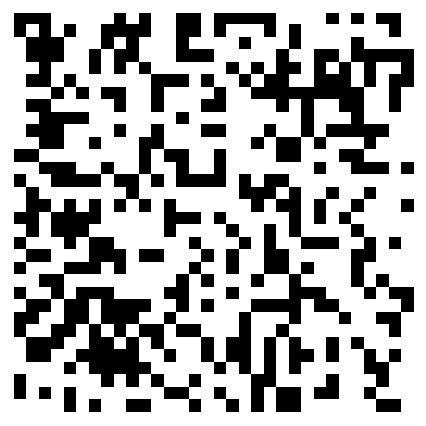

In [775]:
print_forest(hot_D_1.peak_forests[max_idx_hot_1[0][0]])

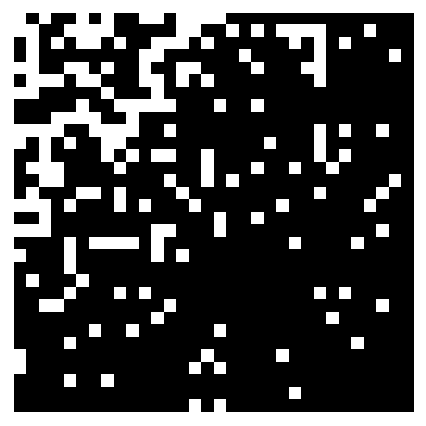

In [763]:
print_forest(hot.peak_forests[max_idx_hot[0][0]])

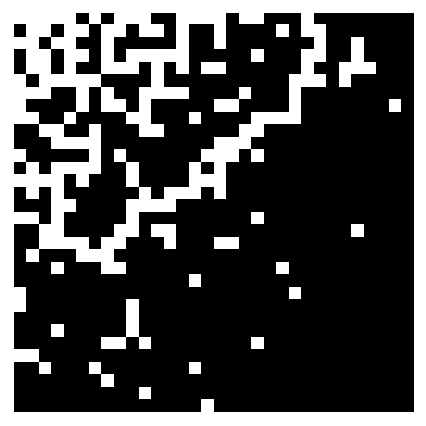

In [764]:
print_forest(hot_D3.peak_forests[max_idx_hot_3[0][0]])

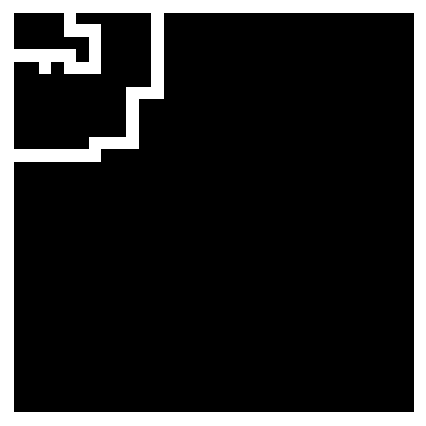

In [765]:
print_forest(hot_D32.peak_forests[max_idx_hot_32[0][0]])

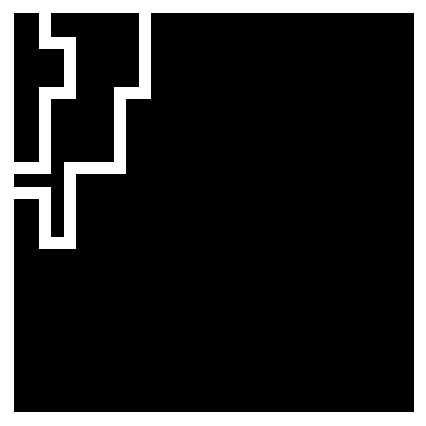

In [766]:
print_forest(hot_D1024.peak_forests[max_idx_hot_1024[0][0]])

#### Now model for a larger grid:

In [780]:
h64_1 = HOT(L=64,D=1)
h64_1.initialize_grids()
h64_1.simulate()

In [781]:
h64_2 = HOT(L=64,D=2)
h64_2.initialize_grids()
h64_2.simulate()

In [782]:
h64_3 = HOT(L=64,D=3)
h64_3.initialize_grids()
h64_3.simulate()

In [783]:
h64_64 = HOT(L=64,D=64)
h64_64.initialize_grids()
h64_64.simulate()

C:\Users\Dave Landay\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  
C:\Users\Dave Landay\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Dave Landay\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':
C:\Users\Dave Landay\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log10
  


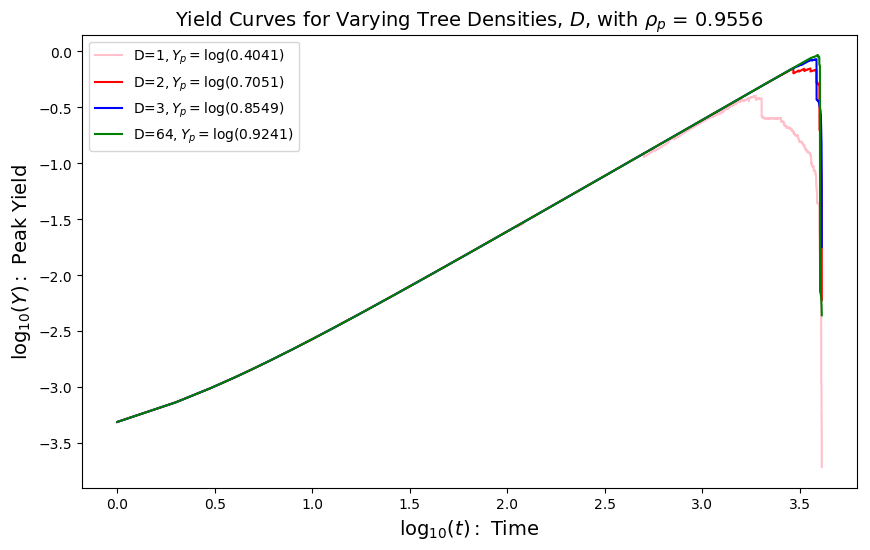

In [796]:
#get a list of times to plot the peak yields against:
times = list(range(64**2))

#initialize a plot:
plt.figure(num=None, figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')

#plot the curves:
plt.plot(np.log10(times), np.log10(h64_1.peak_yld), color='pink', 
         label='D=$1, Y_{} = \log({})$'.format('p',round(h64_1.peak_yld[h64_1.best_idx[0][0]],4)))
plt.plot(np.log10(times), np.log10(h64_2.peak_yld), color='red', 
         label='D=$2, Y_{} = \log({})$'.format('p',round(h64_2.peak_yld[h64_2.best_idx[0][0]],4)))
plt.plot(np.log10(times), np.log10(h64_3.peak_yld), color='blue',
         label='D=$3, Y_{} = \log({})$'.format('p',round(h64_3.peak_yld[h64_3.best_idx[0][0]],4)))
plt.plot(np.log10(times), np.log10(h64_64.peak_yld), color='green',
         label='D=$64, Y_{} = \log({})$'.format('p',round(h64_64.peak_yld[h64_64.best_idx[0][0]],4)))


plt.title(r'Yield Curves for Varying Tree Densities, $D$, with $\rho_{p}$ = '+str(round(h64_64.peak_densities[h64_64.best_idx[0][0]]/64**2,4)), fontsize=14)
plt.legend(loc='upper left')
plt.xlabel(r'$\log_{10}(t):$ Time', fontsize=14)
plt.ylabel(r'$\log_{10}(Y):$ Peak Yield', fontsize=14)
plt.show()

In [789]:
h64_64.peak_densities[h64_64.best_idx[0][0]]/64**2

0.95556640625

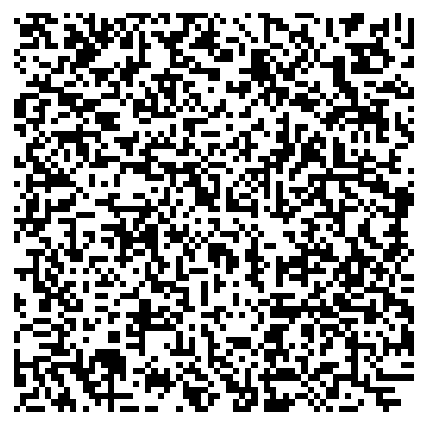

In [797]:
print_forest(h64_1.peak_forests[h64_1.best_idx[0][0]])

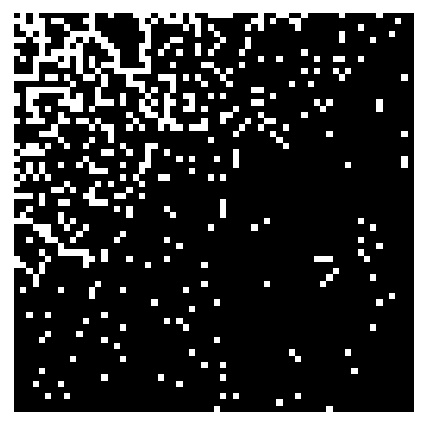

In [798]:
print_forest(h64_2.peak_forests[h64_2.best_idx[0][0]])

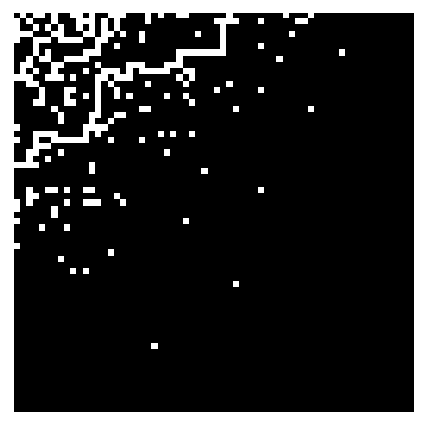

In [799]:
print_forest(h64_3.peak_forests[h64_3.best_idx[0][0]])

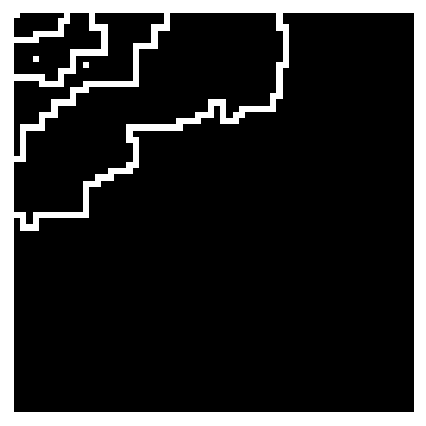

In [800]:
print_forest(h64_64.peak_forests[h64_64.best_idx[0][0]])

#### Now struggle, and go for model on an even larger grid:

In [801]:
h128_1 = HOT(L=128,D=1)
h128_1.initialize_grids()
h128_1.simulate()

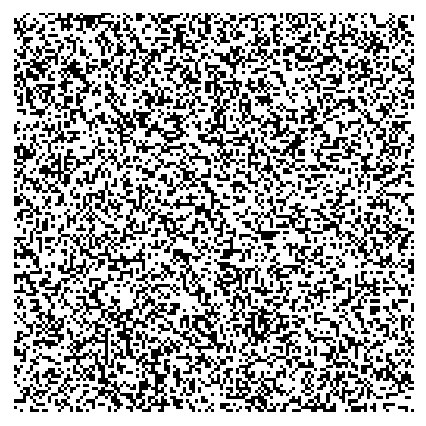

In [802]:
print_forest(h128_1.peak_forests[h128_1.best_idx[0][0]])

In [830]:
h128_2 = HOT(L=128,D=2)
h128_2.initialize_grids()
h128_2.simulate()

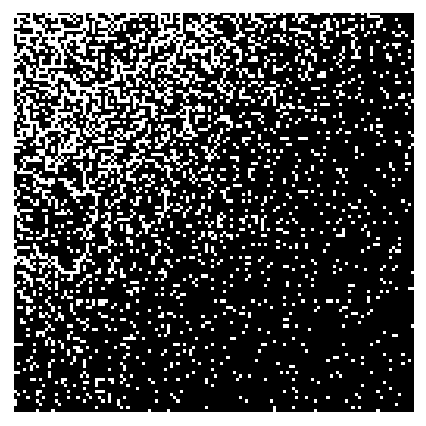

In [832]:
print_forest(h128_2.peak_forests[h128_2.best_idx[0][0]])

In [806]:
from scipy.ndimage import measurements

In [899]:
h128_3 = HOT(L=128,D=3)
h128_3.initialize_grids()
h128_3.simulate()

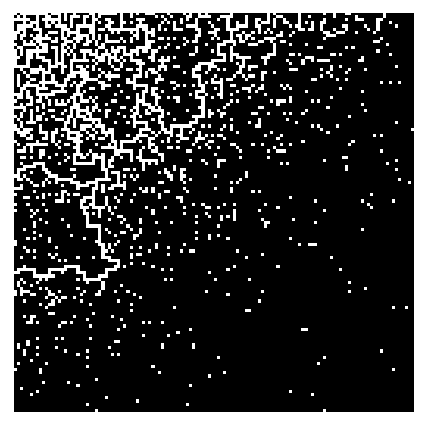

In [900]:
print_forest(h128_3.peak_forests[h128_3.best_idx[0][0]])

In [896]:
h128_128 = HOT(L=128,D=128)
h128_128.initialize_grids()

C:\Users\Dave Landay\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  
C:\Users\Dave Landay\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log10
  
C:\Users\Dave Landay\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Dave Landay\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log10
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Dave Landay\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':
C:\Users\Dave Landay\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in log10
  if sys.path[0] == '':


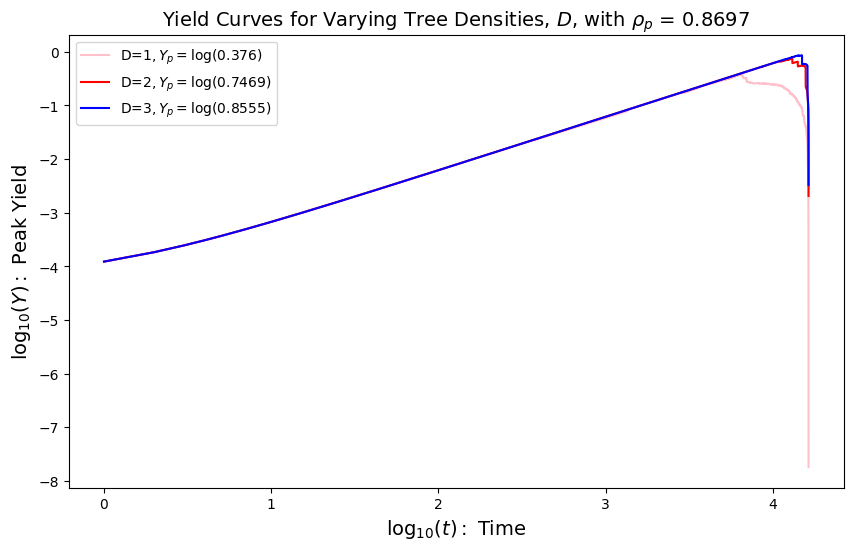

In [901]:
#get a list of times to plot the peak yields against:
times = list(range(128**2))

#initialize a plot:
plt.figure(num=None, figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')

#plot the curves:
plt.plot(np.log10(times), np.log10(h128_1.peak_yld), color='pink', 
         label='D=$1, Y_{} = \log({})$'.format('p',round(h128_1.peak_yld[h128_1.best_idx[0][0]],4)))
plt.plot(np.log10(times), np.log10(h128_2.peak_yld), color='red', 
         label='D=$2, Y_{} = \log({})$'.format('p',round(h128_2.peak_yld[h128_2.best_idx[0][0]],4)))
plt.plot(np.log10(times), np.log10(h128_3.peak_yld), color='blue',
         label='D=$3, Y_{} = \log({})$'.format('p',round(h128_3.peak_yld[h128_3.best_idx[0][0]],4)))


plt.title(r'Yield Curves for Varying Tree Densities, $D$, with $\rho_{p}$ = '+str(round(h128_3.peak_densities[h128_3.best_idx[0][0]]/128**2,4)), fontsize=14)
plt.legend(loc='upper left')
plt.xlabel(r'$\log_{10}(t):$ Time', fontsize=14)
plt.ylabel(r'$\log_{10}(Y):$ Peak Yield', fontsize=14)
plt.show()

#### Attempt to plot the component size distributions:

In [1086]:
def get_peak_size_dist(mat):
    """
        GET_PEAK_SIZE_DIST: calculates the distribution of sizes for each peak component.
                            stores the distribution as a dictionary where keys represent
                            distinct sizes of components, and values represent frequencies
                            
                            
                            ARGS:
                                mat: a 2D array representing the forest at peak yield
                                
                         RETURNS:
                               A dictionary representing the component size distribution 
    """
    #store the distribution as a dictionary 
    dist = {}
    
    #get the distribution:
    s, counts = label(mat, return_num=True)
    
    #populate the distribution dictionary:
    for i in range(counts):
        if len(s[s == i+1]) not in dist:
            dist[len(s[s == i+1])] = 1
        else:
            dist[len(s[s == i+1])] +=1
        
    #return the distribution:
    return dist

In [1087]:
#size distribution of components for L=32, D = 1:
S32_1 = get_peak_size_dist(hot_D_1.peak_forests[max_idx_hot_1[0][0]])

#size distribution of components for L=32, D = 2:
S32_2 = get_peak_size_dist(hot.peak_forests[max_idx_hot[0][0]])

#size distribution of components for L=32, D = 3:
S32_3 = get_peak_size_dist(hot_D3.peak_forests[max_idx_hot_3[0][0]])

#size distribution of components for L=32, D = 32:
S32_32 = get_peak_size_dist(hot_D32.peak_forests[max_idx_hot_32[0][0]])

#size distribution of components for L=32, D = 1024:
S32_1024 = get_peak_size_dist(hot_D1024.peak_forests[max_idx_hot_1024[0][0]])

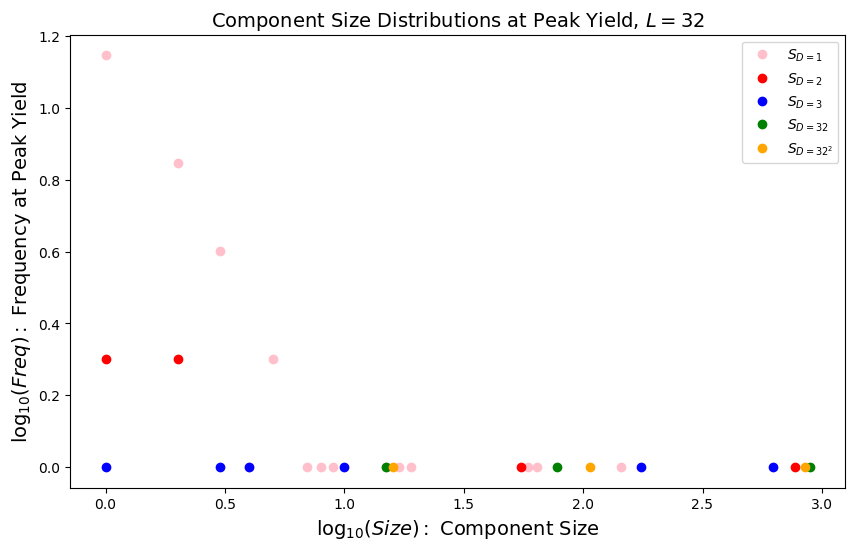

In [1091]:
#initialize a plot:
plt.figure(num=None, figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')

#plot the curves:
plt.plot(np.log10(list(S32_1.keys())), np.log10(list(S32_1.values())),'o', color='pink', label=r'$S_{D=1}$')
plt.plot(np.log10(list(S32_2.keys())), np.log10(list(S32_2.values())), 'o',color='red', label=r'$S_{D=2}$')
plt.plot(np.log10(list(S32_3.keys())), np.log10(list(S32_3.values())), 'o',color='blue',label=r'$S_{D=3}$')
plt.plot(np.log10(list(S32_32.keys())), np.log10(list(S32_32.values())), 'o',color='green',label=r'$S_{D=32}$')
plt.plot(np.log10(list(S32_1024.keys())), np.log10(list(S32_1024.values())), 'o',color='orange', label=r'$S_{D=32^2}$')

plt.title(r'Component Size Distributions at Peak Yield, $L=32$', fontsize=14)
plt.legend(loc='upper right')
plt.xlabel(r'$\log_{10}(Size):$ Component Size', fontsize=14)
plt.ylabel(r'$\log_{10}(Freq):$ Frequency at Peak Yield', fontsize=14)
plt.show()

In [1092]:
#size distribution of components for L=32, D = 1:
S64_1 = get_peak_size_dist(h64_1.peak_forests[h64_1.best_idx[0][0]])

#size distribution of components for L=32, D = 2:
S64_2 = get_peak_size_dist(h64_2.peak_forests[h64_2.best_idx[0][0]])

#size distribution of components for L=32, D = 3:
S64_3 = get_peak_size_dist(h64_3.peak_forests[h64_3.best_idx[0][0]])

#size distribution of components for L=32, D = 32:
S64_64 = get_peak_size_dist(h64_64.peak_forests[h64_64.best_idx[0][0]])

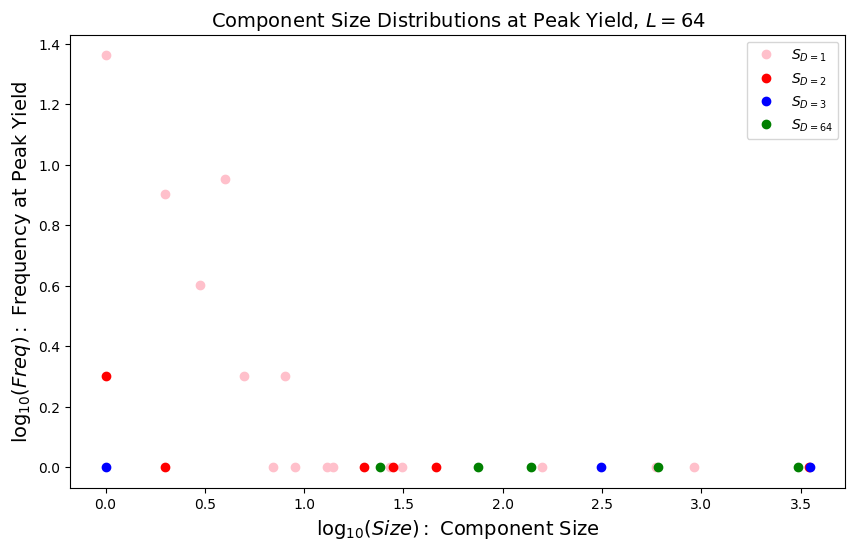

In [1094]:
#initialize a plot:
plt.figure(num=None, figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')

#plot the curves:
plt.plot(np.log10(list(S64_1.keys())), np.log10(list(S64_1.values())), 'o',color='pink', label=r'$S_{D=1}$')
plt.plot(np.log10(list(S64_2.keys())), np.log10(list(S64_2.values())), 'o',color='red', label=r'$S_{D=2}$')
plt.plot(np.log10(list(S64_3.keys())), np.log10(list(S64_3.values())), 'o',color='blue',label=r'$S_{D=3}$')
plt.plot(np.log10(list(S64_64.keys())),np.log10(list(S64_64.values())), 'o',color='green',label=r'$S_{D=64}$')

plt.title(r'Component Size Distributions at Peak Yield, $L=64$', fontsize=14)
plt.legend(loc='upper right')
plt.xlabel(r'$\log_{10}(Size):$ Component Size', fontsize=14)
plt.ylabel(r'$\log_{10}(Freq):$ Frequency at Peak Yield', fontsize=14)
plt.show()

In [1095]:
#size distribution of components for L=32, D = 1:
S128_1 = get_peak_size_dist(h128_1.peak_forests[h128_1.best_idx[0][0]])

#size distribution of components for L=32, D = 2:
S128_2 = get_peak_size_dist(h128_2.peak_forests[h128_2.best_idx[0][0]])

#size distribution of components for L=32, D = 3:
S128_3 = get_peak_size_dist(h128_3.peak_forests[h128_3.best_idx[0][0]])


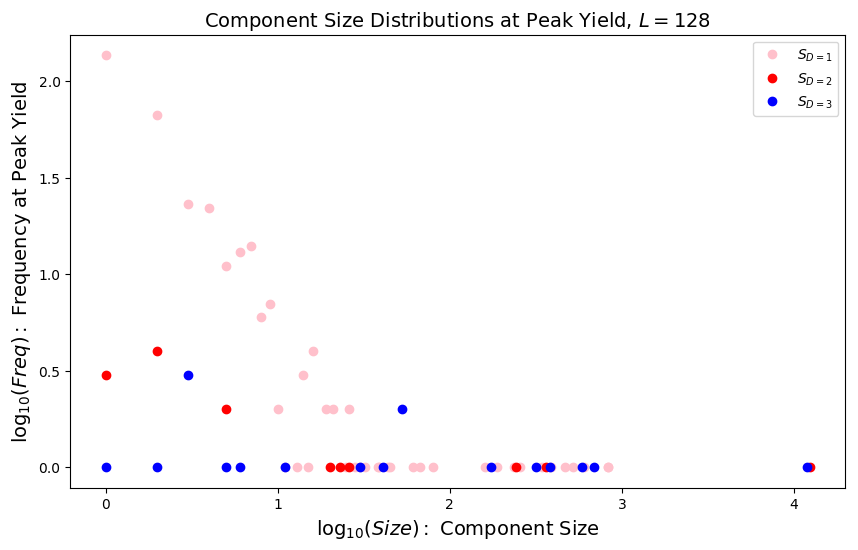

In [1097]:
#initialize a plot:
plt.figure(num=None, figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')

#plot the curves:
plt.plot(np.log10(list(S128_1.keys())), np.log10(list(S128_1.values())), 'o',color='pink', label=r'$S_{D=1}$')
plt.plot(np.log10(list(S128_2.keys())), np.log10(list(S128_2.values())), 'o',color='red', label=r'$S_{D=2}$')
plt.plot(np.log10(list(S128_3.keys())), np.log10(list(S128_3.values())), 'o',color='blue',label=r'$S_{D=3}$')

plt.title(r'Component Size Distributions at Peak Yield, $L=128$', fontsize=14)
plt.legend(loc='upper right')
plt.xlabel(r'$\log_{10}(Size):$ Component Size', fontsize=14)
plt.ylabel(r'$\log_{10}(Freq):$ Frequency at Peak Yield', fontsize=14)
plt.show()

#### Without modifying the code more, we are unable to generate $D = L^2$ grids for large $L$. Let's generate Component size distributions for $L=32$, $D=32^2$ for the forests with Peak Yields of the following densities:
#### $\rho = 0.10, 0.20, ...,$ and $0.90$

In [1098]:
def get_L2_densities(hot_obj, rho):
    """
        GET_L2_DENSITIES: gets the component size distribution at peak yield for a specific 
                          density
                          
                        ARGS:
                            hot_obj: a HOT() object that we created earlier.
                                     Type: object (specifically a HOT() object)
                            
                            rho: specific density at which we wish to find the 
                                 component size distribution. Type:float
    """
    #hold distribution in a dictionary:
    dist = {}
    
    #find the indices for which a forest at peak yield corresponds to the density:
    indices = [idx for idx,el in enumerate(hot_obj.peak_densities/(hot_obj.L**2)) if round(el,4) == rho]
    
    #get the distribution for each peak yield:
    temp = [get_peak_size_dist(hot_obj.peak_forests[i]) for i in indices]
    
    #combine the dictionaries into one:
    for dic in temp:
        for key in dic:
            if key in dist:
                dist[key] += dic[key]
            else:
                dist[key] = dic[key]
    
    #return the distribution:
    return dist

In [1099]:
S1024_rho_01 = get_L2_densities(hot_D1024, 0.0996)
S1024_rho_02 = get_L2_densities(hot_D1024, 0.1992)
S1024_rho_03 = get_L2_densities(hot_D1024, 0.2998)
S1024_rho_04 = get_L2_densities(hot_D1024, 0.3994)
S1024_rho_05 = get_L2_densities(hot_D1024, 0.5)
S1024_rho_06 = get_L2_densities(hot_D1024, 0.5996)
S1024_rho_07 = get_L2_densities(hot_D1024, 0.6992)
S1024_rho_08 = get_L2_densities(hot_D1024, 0.7998)
S1024_rho_09 = get_L2_densities(hot_D1024, 0.8994)

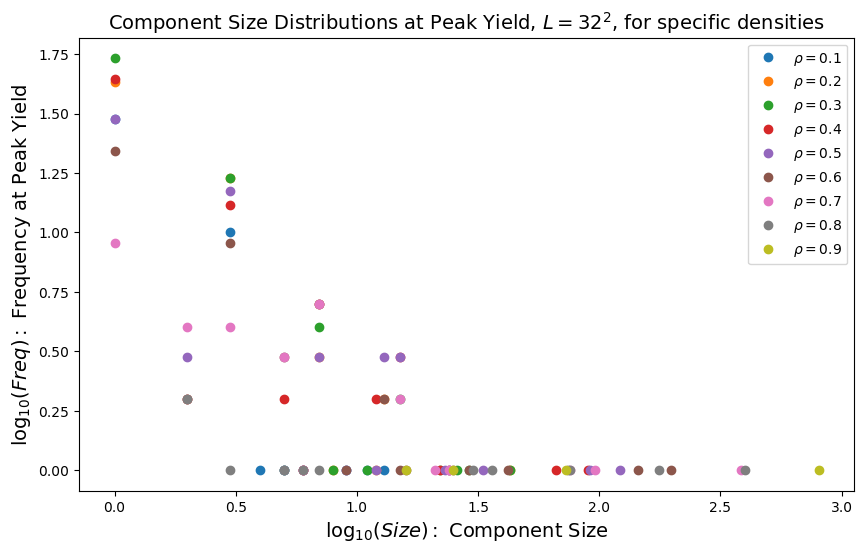

In [1101]:
#initialize a plot:
plt.figure(num=None, figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')

#plot the curves:
plt.plot(np.log10(list(S1024_rho_01.keys())), np.log10(list(S1024_rho_01.values())), 'o',label=r'$\rho = 0.1$')
plt.plot(np.log10(list(S1024_rho_02.keys())), np.log10(list(S1024_rho_02.values())),  'o',label=r'$\rho = 0.2$')
plt.plot(np.log10(list(S1024_rho_03.keys())), np.log10(list(S1024_rho_03.values())),  'o',label=r'$\rho = 0.3$')
plt.plot(np.log10(list(S1024_rho_04.keys())), np.log10(list(S1024_rho_04.values())),  'o',label=r'$\rho = 0.4$')
plt.plot(np.log10(list(S1024_rho_05.keys())), np.log10(list(S1024_rho_05.values())),  'o',label=r'$\rho = 0.5$')
plt.plot(np.log10(list(S1024_rho_06.keys())), np.log10(list(S1024_rho_06.values())),  'o',label=r'$\rho = 0.6$')
plt.plot(np.log10(list(S1024_rho_07.keys())), np.log10(list(S1024_rho_07.values())),  'o',label=r'$\rho = 0.7$')
plt.plot(np.log10(list(S1024_rho_08.keys())), np.log10(list(S1024_rho_08.values())),  'o',label=r'$\rho = 0.8$')
plt.plot(np.log10(list(S1024_rho_09.keys())), np.log10(list(S1024_rho_09.values())),  'o',label=r'$\rho = 0.9$')


plt.title(r'Component Size Distributions at Peak Yield, $L=32^2$, for specific densities', fontsize=14)
plt.legend(loc='upper right')
plt.xlabel(r'$\log_{10}(Size):$ Component Size', fontsize=14)
plt.ylabel(r'$\log_{10}(Freq):$ Frequency at Peak Yield', fontsize=14)
plt.show()